Data + Problem Statement
- Pandas (Reading/Manipulation/Aggregating/Cleaning)
- Matplotlib / Seaborn / Plotly -- Visualization using Graphs
- Read Graph and make analysis (EDA)
- Taking Business Decisions using the Data

In [1]:
import pandas as pd


In [3]:
pip install matplotlib seaborn plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------- ----------- 5.8/8.1 MB 27.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 24.4 MB/s  0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------------------- -------------- 6.3/9.8 MB 30.2 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 26.2 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 19.0 MB/s  0:00:00

   ---------------------------------------- 0/9 [pyparsing]
   ---- ----------------------------------- 1/9 [narwhals]
   ---- ----------------------------------- 1/9 [narwhals]
   ---- ----------------------------------- 1/9 [narwhals]
   ---- ----------------------------------- 1/9 [narwhals]
   ------------- -------------------------

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('cars_dataset.csv')
df.head(2)

,car_ID,symboling,carname,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,two,convertible,front,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,two,convertible,front,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0


two types of data:
- Numerical Data (height, length, width, ratio, etc)
- Categorical Data (doornumber, carbody, engineloccation, gender, bloodgroup)

1. Find out what type of Graph needs to be plotted with above type of data
2. what is pupose of the Graph

Scatter Plot
- used for numerical vs numerical data (Ex: Age vs Salary)
- Purpose of graph is how one numerical data is related to another numerical data


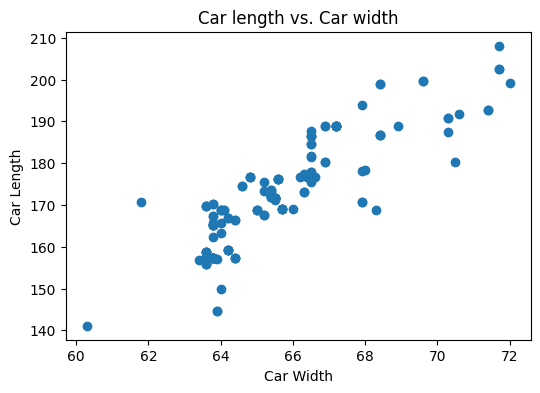

In [ ]:
plt.figure(figsize = (6, 4))
#logic for scatter plot
plt.scatter(x = df['carwidth'], 
            y = df['carlength'])
plt.xlabel('Car Width')
plt.ylabel('Car Length')
plt.title('Car length vs. Car width')

plt.show()

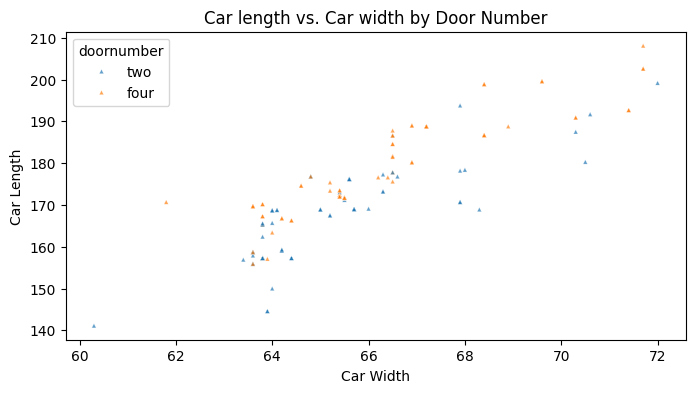

In [67]:
plt.figure(figsize = (8, 4))
sns.scatterplot(x = df['carwidth'], 
                y = df['carlength'], 
                hue = df['doornumber'],
                s = 10,
                marker = "^",
                color = 'green',
                alpha = 0.7)
plt.xlabel('Car Width')
plt.ylabel('Car Length')
plt.title('Car length vs. Car width by Door Number')
plt.show()


Bar Graph 
- used for numerical vs. categorical ( salary vs gender)
    (price of car vs. doornumber)


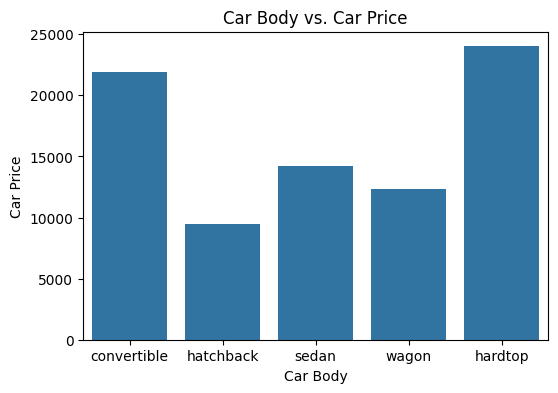

In [ ]:
# Bar Graph 
# x-axis = categorical , y-axis = numerical

plt.figure(figsize = (6, 4))
#logic for scatter plot
sns.barplot(x = df['carbody'], 
            y = df['price'], 
            errorbar=None) #by default it will take mean value of numerical data for each category

plt.xlabel('Car Body')
plt.ylabel('Car Price')
plt.title('Car Body vs. Car Price')

plt.show()

In [20]:
df.groupby('carbody')['price'].mean()

carbody
convertible    21890.500000
hardtop        24004.142857
hatchback       9506.699283
sedan          14177.764706
wagon          12337.350000
Name: price, dtype: float64

In [21]:
import numpy as np

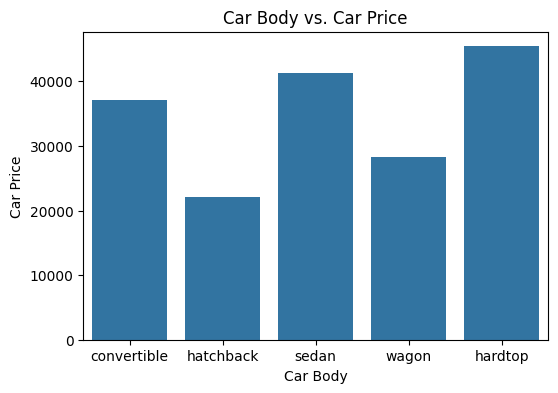

In [ ]:
# Bar graph with different estimator function 
plt.figure(figsize = (6, 4))
#logic for scatter plot
sns.barplot(x = df['carbody'], 
            y = df['price'], 
            errorbar=None, 
            estimator = np.max) #by default it will take mean value of numerical data for each category

plt.xlabel('Car Body')
plt.ylabel('Car Price')
plt.title('Car Body vs. Car Price')

plt.show()

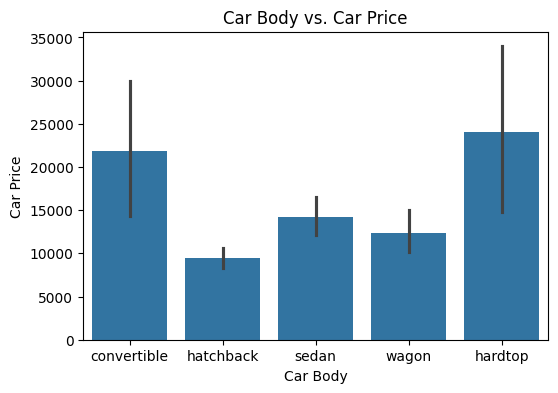

In [38]:
# Bar graph with different estimator function with error bars
plt.figure(figsize = (6, 4))
#logic for scatter plot
sns.barplot(x = df['carbody'], 
            y = df['price'], 
            estimator = np.mean) #by default it will take mean value of numerical data for each category
#plt.bar(x = df['carbody'], y = df['price'])
plt.xlabel('Car Body')
plt.ylabel('Car Price')
plt.title('Car Body vs. Car Price')

plt.show()

Pie Chart
seaborn does not have Pie chart feature, so we use plt.pie
- used for categorical column 

In [43]:
df['carbody'].value_counts()
df['carbody'].value_counts().index


Index(['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible'], dtype='object', name='carbody')

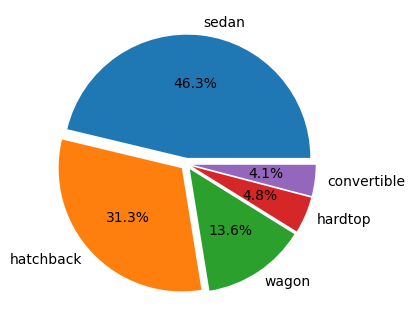

In [ ]:
plt.figure(figsize = (6,4))
plt.pie(
    x = df['carbody'].value_counts(),
    labels = df['carbody'].value_counts().index,
    autopct = '%1.1f%%',
    explode = [0.05]*len(df['carbody'].value_counts()),
    #explode = (0, 0.1, 0, 0, 0.1, 0),

)
plt.show()

Histogram
- distribution of numerical data

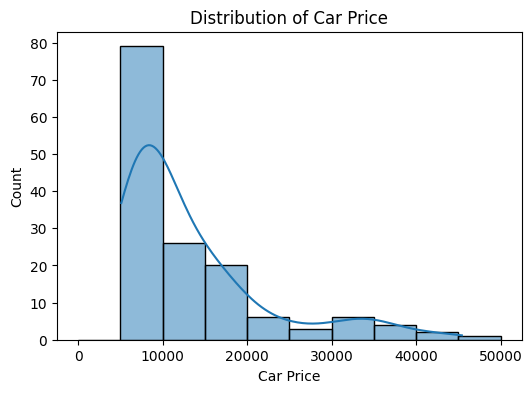

In [53]:
plt.figure(figsize=(6, 4))
sns.histplot(x = df['price'], bins = range(0, 50001, 5000), kde = True)
plt.xlabel('Car Price')
plt.ylabel('Count')
plt.title('Distribution of Car Price')
plt.show()

Box Plot
- used for single numerical data
- used for numerical data vs. categorical data same as varplot

Quartile Distributions (left and right whiskers on the side of the box)
Outlier Detection (the circles in the box plot)

Formula to calculate the whiskers (iqr = inter-quartile range):
lw = q1- 1.5 * iqr 
uw = q3 + 1.5* iqr 
iqr = q3-q1

In [ ]:
df['horsepower'].describe()
'''
Quartile Distributions
25%       69.000000
50%       95.000000
75%      116.000000
'''

count    147.000000
mean     102.734694
std       39.467227
min       48.000000
25%       69.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

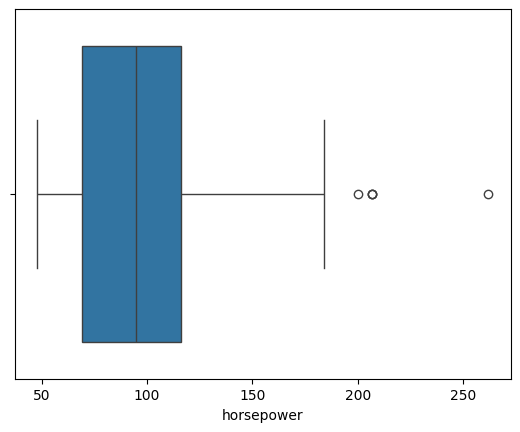

In [55]:
sns.boxplot(x = df['horsepower'])
plt.show()

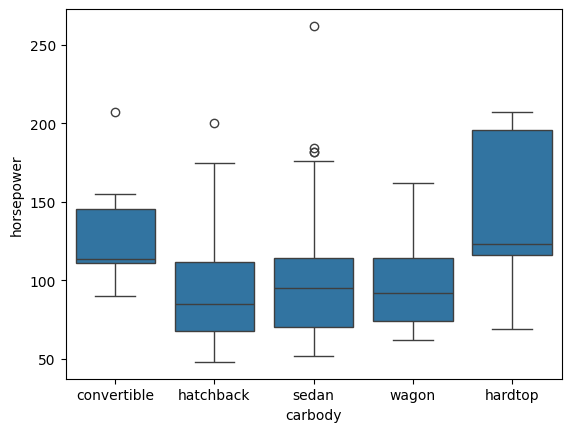

In [56]:
sns.boxplot(x = df['carbody'], y = df['horsepower'])
plt.show()

Heatmap

Heatmap is used to plot the correlation matrix between numerical features in the dataset (-1 to +1 is the values of correlation)


In [57]:
df[['carlength', 'carwidth', 'price', 'highwaympg']].corr()

,carlength,carwidth,price,highwaympg
carlength,1.000000,0.858739,0.694881,-0.714051
carwidth,0.858739,1.000000,0.761044,-0.697737
price,0.694881,0.761044,1.000000,-0.712092
highwaympg,-0.714051,-0.697737,-0.712092,1.000000


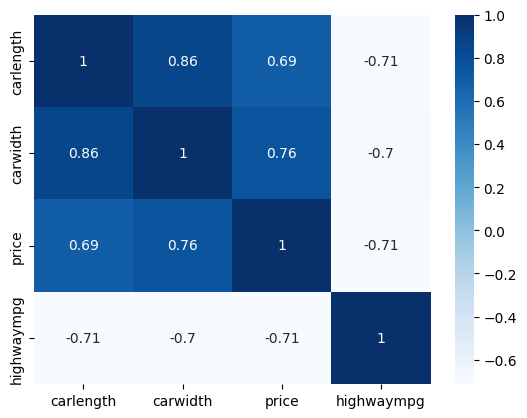

In [61]:
sns.heatmap(df[['carlength', 'carwidth', 'price', 'highwaympg']].corr(), annot=True, cmap = 'Blues')#cmap='coolwarm')
plt.show()

In [69]:
sns.color_palette

<function seaborn.palettes.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)>

Quiz questions:

nykaa.csv

sns.histplot(
    data = df.loc[df['Product Brand'].isin(['Biotique', 'Himalaya', 'Lotus Herbals']), :],
    x = 'Product Price',
    hue = 'Product Brand',
    bins = 10,
    multiple = 'stack'
)
plt.show()

sns.countplot(
    data = df.loc[df['Product Brand'].isin(['Biotique', 'Himalaya', 'Lotus Herbals']), :],
    x = 'Product Brand',
)
plt.show()
=

In [ ]:
#orrect! You can verify this by running the following code:

sns.boxplot(
    data = df.loc[df['Product Brand'].isin(['Biotique', 'Himalaya', 'Lotus Herbals']), :],
    x = 'Product Brand',
    y = 'Product Price',
)
plt.show()